<a href="https://colab.research.google.com/github/thaithong2911/NhapMonPhanTichDuLieuVaHocSau/blob/main/Lab07/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Thực hiện bài nhận dạng chữ viết tay với thư viện Keras.

x_train shape (60000, 28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 40)                440       
                                                                 
 activation_4 (Activation)   (None, 40)                0         
                                          

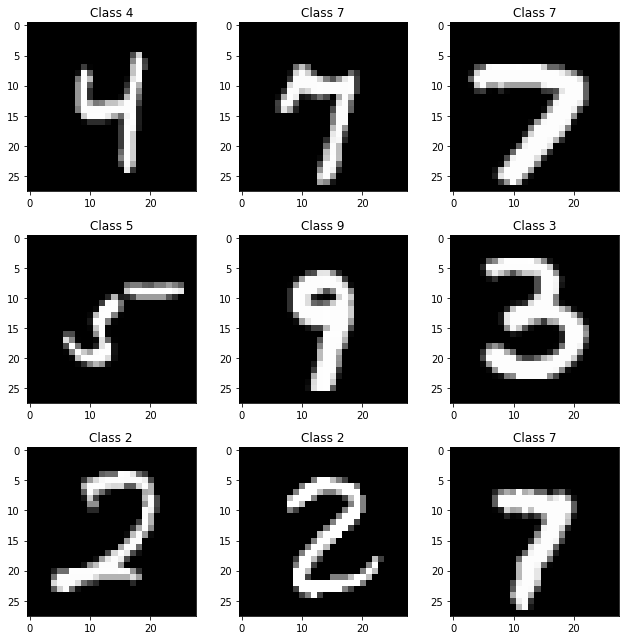

In [ ]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
# để chọn ngẫu nhiên các tấm ảnh
import random
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28

print("x_train shape",x_train.shape)

# nếu muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train thì dùng hàm sau
"""
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()  
"""
# thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector, 
# vì tập dữ liệu mnist được lưu ở dạng 
# ma trận 2 chiều gồm 28 dòng và 28 cột
# trước khi truyền vào mạng neural cần chuyển sang dạng vector. Nếu dùng mạng CNN thì ko cần chuyển
# mạng CNN các sv tự tìm hiểu thêm
# 784= 28*28
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

# sau khi chuẩn hóa xong muốn xem lại tập train thì cùng hàm print
print(x_train)

# tương tự đối với tập train,tập test chỉ gồm 10000 tấm ảnh
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

# sau khi chuẩn hóa xong muốn xem lại tập test thì cùng hàm print
print(x_test)

# vì đầu ra của mạng neural là nhận dạng 1 tấm ảnh thuộc 1 trong các lớp 0-9, nên ta dùng hàm này để 
# gán các giá trị kết quả cho tập y_test
# ví dụ tấm ảnh là số 2 thì y_test ứng với tấm đó là:
# [[0. 0. 1. ... 0. 0. 0.]]
# giá trị ở vị trí số 2 là 1, các giá trị còn lại là 0
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)

model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thể thay đổi
model.add(Dense(40))
model.add(Activation('relu'))
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
model.fit(x_train,y_train,batch_size=128,epochs=5)

# dự báo mô hình, giá trị dự báo được lưu vào biến predicted_classes
# giá trị thực tế được lưu ở tập t_test
predicted_classes=model.predict(x_test)

# hiển thị 9 tấm ảnh ngẫu nhiên trong tập test
# hiển thị kết quả dự báo của 9 tấm ảnh này theo mô hình neural vừa xây dựng
# vì hàm imshow để hiển thị tấm ảnh dạng 28*28, vì ta đã reshape tấm ảnh thành dạng vector ở bước trước
# nên bây giờ muốn hiển thị tấm ảnh cho tập dữ liệu đã reshape, ta lại dùng hàm reshape để về dạng ban đầu
# vì hàm softmax dùng ở mạng neural ở lớp output là hàm tính xác suất, nên xác suất rơi vào lớp nào nhiều nhất thì output sẽ ra giá trị đó.
# muốn xuất kết quả dự báo, ta dùng hàm argmax()
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()

2. Phân loại ảnh với dữ liệu CIFAR10 dataset bao gồm 50,000 training set và 10.000 test set ảnh màu kích thước 32x32 cho 10 thể loại khác nhau (máy bay, ô tô, thuyền, chim, chó, mèo, ngựa,...).

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

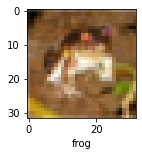

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8087 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.6246 - accuracy: 0.4245
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.5405 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4821 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4329 - accuracy: 0.4956


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.40      0.50      1000
           1       0.73      0.40      0.52      1000
           2       0.37      0.35      0.36      1000
           3       0.41      0.22      0.29      1000
           4       0.52      0.29      0.37      1000
           5       0.43      0.36      0.39      1000
           6       0.34      0.82      0.48      1000
           7       0.56      0.52      0.54      1000
           8       0.49      0.76      0.59      1000
           9       0.54      0.56      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4518 - accuracy: 0.4803
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1112 - accuracy: 0.6105
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9985 - accuracy: 0.6547
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9179 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8513 - accuracy: 0.7038
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7992 - accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7506 - accuracy: 0.7385
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7042 - accuracy: 0.7547
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6594 - accuracy: 0.7697
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9590 - accuracy: 0.6836


[0.9590146541595459, 0.6836000084877014]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.21568892e-04, 4.28859530e-05, 1.16932474e-03, 8.95658076e-01,
        1.03409227e-03, 9.76415426e-02, 3.41185695e-03, 1.93472551e-05,
        6.22177264e-04, 7.90526174e-05],
       [4.58504679e-03, 4.85243835e-03, 2.89304847e-08, 1.54679498e-07,
        7.04664727e-09, 3.62209018e-09, 6.55717564e-11, 7.15250152e-08,
        9.90151465e-01, 4.10758366e-04],
       [4.59593870e-02, 5.58847725e-01, 8.57756997e-04, 3.92698357e-03,
        1.49109284e-03, 1.30434707e-03, 1.48672581e-04, 2.03363132e-03,
        2.82429427e-01, 1.03000931e-01],
       [2.66490668e-01, 3.20389424e-03, 2.08438234e-03, 1.38394639e-03,
        1.64229795e-02, 2.87606636e-05, 2.76010338e-04, 6.08024187e-04,
        7.09081113e-01, 4.20251890e-04],
       [8.41701421e-06, 6.85240138e-06, 1.92587581e-02, 2.00026482e-01,
        3.91698867e-01, 1.82523020e-02, 3.70014012e-01, 5.29628189e-04,
        9.55022842e-05, 1.09223794e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

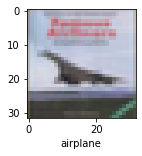

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'ship'

In [ ]:
classes[y_classes[9]]

'automobile'